<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Regresión Polinómica</center></h1>

<h4>Acerca de este Laboratorio</h4>
Aprenderemos cómo utilizar la librería scikit-learn para implementar una Regresión Polinómica. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, separaremos nuestros datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos.


<h1>Indice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">Descarga de Datos</a></li>
        <li><a href="#polynomial_regression">Regresión Polinómica</a></li>
        <li><a href="#evaluation">Evaluación</a></li>
        <li><a href="#practice">Practica</a></li>
    </ol>
</div>
<br>
<hr>


### Importando los paquetes necesarios


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="download_data">Descarga de Datos</h2>
Para descargar los datos, usaremos !wget desde IBM Object Storage.


In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

¿Sabías que? Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Entender los Datos

### `FuelConsumption.csv`:

Hemos descargado el dataset de consumo de combustible, **`FuelConsumption.csv`**, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. [Fuente de Datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101ES-edX-20816812&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101ES-edX-20816812&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101ES-edX-20816812&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101ES-edX-20816812&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** (Año del modelo) e.g. 2014
-   **MAKE** (fabricante) e.g. Acura
-   **MODEL** (modelo) e.g. ILX
-   **VEHICLE CLASS** (tipo de vehiculo) e.g. SUV
-   **ENGINE SIZE** (tamaño del motor) e.g. 4.7
-   **CYLINDERS** (cilindrada) e.g 6
-   **TRANSMISSION** (transmisión) e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** (consumo en ciudad) e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** (consumo en carretera) e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** (consumo mixto) e.g. 9.2
-   **CO2 EMISSIONS (g/km)** (emisiones de dioxido de carbono) e.g. 182   --> low --> 0


## Leyendo los datos


In [3]:
df = pd.read_csv("../FuelConsumptionCo2.csv")

# observar dentro del conjunto de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seleccionemos algunas caracaterísticas para usar en la regresión


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Grafiquemos los valores de emisión respecto al tamaño del motor:


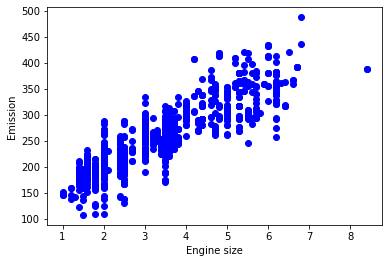

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Crear conjunto de datos de entrenamiento y pruebas

Hay que dividir el conjunto en dos, el de entrenamiento y el de pruebas, los cuales son mutuamente excluyentes. Despues de hacerlo, deberá entrenar con el conjunto de entrenamiento y hacer pruebas con el conjunto de pruebas.


In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Regresión Polinómica</h2>


En ocasiones la tendencia de los datos no es lineal si no que tiene una apariencia curva. Para estos caso podemos usar los métodos de Regresión Polinómica. De hecho, existen diversos tipos de regresión que pueden ser usados para ajustarse de acuerdo a la apariencia de los datos, como puede ser la regresión cuadratica, cúbica, etc. Puede haber tantos tipos de regresiones como grados en un polinomio.

En esencia, llamamos a todas regresión polinomica, donde el relación entre la variable independiente x y la dependiente y se modela como un polinomia de n grados en x. Digamos que quiere realizar un Regresión Polinómica de segundo grado:

$y = b + \\theta_1  x + \\theta_2 x^2$

Ahora la pregunta es: ¿Como podemos ajustar los datos en esta ecuación teniendo solo valores de x, como el caso de **Engine Size**?
Podemos generar unas pocas características adicionales: 1, $x$, and $x^2$.

La función **PloynomialFeatures()** de la librería Scikit-learn maneja un nuevo conjunto de características del conjunto original. Esto es, un matriz será generada y que consiste de todas las combinaciones polinomicas de las características de menor o los mismos grados especificados. Por ejemplo, digamos que el conjunto de características original tiene solo una, _ENGINESIZE_. Ahora, si seleccionamos el grado del polinomio como 2, generará 3 características; degree=0, degree=1 and degree=2:


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** toma los valores de x e imprime una lista de los datos que van desde la magnitud 0 a la 2 (ya que hemos seleccionado que nuestro polinómio sea de segundo grado).

$
\\begin{bmatrix}
    v_1\\
    v_2\\
    \\vdots\\
    v_n
\\end{bmatrix}
$
$\\longrightarrow$
$
\\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \\vdots & \\vdots & \\vdots\\
    [ 1 & v_n & v_n^2]
\\end{bmatrix}
$

en nuestro ejemplo

$
\\begin{bmatrix}
    2\.\\
    2.4\\
    1.5\\
    \\vdots
\\end{bmatrix}
$
$\\longrightarrow$
$
\\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \\vdots & \\vdots & \\vdots\\
\\end{bmatrix}
$


Parecen unos conjuntos de características para el analisis de la regresión lineal multiple, ¿verdad?, si, lo es. De hecho la regresión polinomial es un caso especial de regresión lineal con la idea principal de como se seleccionan las características. Considere cambiar $x$ with $x_1$, $x_1^2$ por $x_2$ y así en adelante. La ecuación de segundo grado quedaría asi:

$y = b + \\theta_1  x_1 + \\theta_2 x_2$

Ahora podemos manejar el problema como si se tratara de una 'regresión lineal'. Por lo tanto, esta regresión polinomica se considera como un caso especial de regresión lineal múltiple. Puede utilizar la misma mecánica para resolver dicho problema.

Usemos la función **LinearRegression()** para resolver:


In [8]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# los coeficientes 
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.06519473 -1.67835167]]
Intercept:  [104.56410352]


Como se mencionó anteriormente **Coeficiente** e **Intercepción** son los parámetros de ajuste de la línea curva. Dado que se trata de una regresión lineal multiple con 3 parámetros y sabiendo que estos son la intercepción y el coeficiente del hiperplano, sklearn los estimó desde un nuevo conjunto de características. Grafiquemoslo:


Text(0, 0.5, 'Emission')

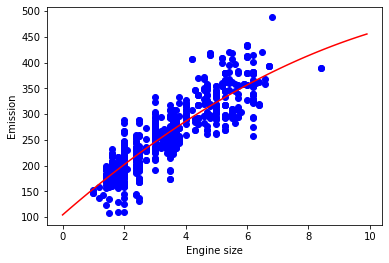

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluación</h2>


In [10]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.88
Residual sum of squares (MSE): 860.86
R2-score: 0.70


<h2 id="practice">Practica</h2>

Trate de usar la regresión polinómica con el conjunto de datos pero en esta ocasión de tercer grado (cúbica). ¿Tiene mejor precisión?


Mean absolute error: 22.92
Residual sum of squares (MSE): 861.94
R2-score: 0.71


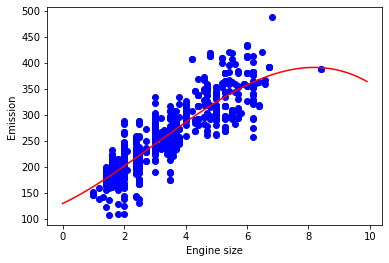

In [22]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX+ clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3) # ojo, un término más al ser de grado 3
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

Haz doble clic <b>aquí</b> para ver la solución.

<!-- Your answer is below:

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


-->


Coefficients:  [[ 0.         28.54599835  4.75557661 -0.52961753]]
Intercept:  [129.70187057]
Mean absolute error: 22.92
Residual sum of squares (MSE): 861.94
R2-score: 0.71


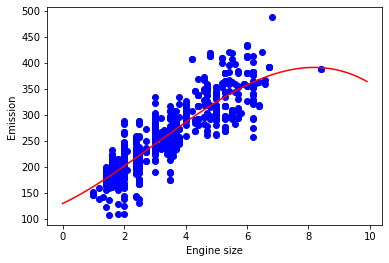

In [21]:
# True solution
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )



<h2>¿Deseas aprender más?</h2>

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>¡Gracias por completar esta lección!</h3>

<h4>Autor:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>

<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un científico de datos en IBM con una trayectoria en el desarrollo de aplicaciones empresariales para el incremento sustancial de la habilidad de los clientes para convertir datos en conocimiento util. Es investigador en minería de datos y experto en el desarrollo de métodos analíticos avanzados como son, el aprendizaje automático y el modelado estadístico en grandes conjunto de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>
